In [1]:
import os
import sys
sys.path.append(r"C:\Users\Cristhian\Documents\github\QuantumGRN")
import numpy as np
import pandas as pd

In [2]:
filename="../dataset/expr_matrix_pearsonresidual_7.txt"
df = pd.read_csv(filename, delimiter='\t')
df = df.set_index('genes').T
print(df.columns)
df.head()

Index(['AICDA', 'IRF4', 'PAX5', 'PRDM1', 'REL', 'RELA'], dtype='object', name='genes')


genes,AICDA,IRF4,PAX5,PRDM1,REL,RELA
X1,-0.744255,-1.389371,0.869163,-0.639366,0.499583,-0.558294
X2,-0.574980,0.760179,1.470277,-0.493802,0.178566,-0.431103
X3,-0.756529,0.670392,5.327456,-0.649925,1.276864,1.188840
X4,1.000327,-1.152912,-0.541244,-0.529274,0.039775,-0.462092
X5,-0.505078,-0.946417,-0.443544,-0.433726,-0.800315,-0.378630


In [3]:
from qscgrn import *

ncells, ngenes = df.shape
df = qsc_order_gene(df)
genes = df.columns.to_list()
p_obs = qsc_distribution(df)
activation = qsc_activation_ratios(df)

2022-11-21 15:26:30 | I | The dataframe genes are ordered
2022-11-21 15:26:30 | I | The observed probability `p_obs` is calculated
2022-11-21 15:26:30 | I | Activation ratios are computed


2022-11-21 15:26:30 | I | Plotting the Observed distribution in a barplot and exporting to 03_p_obs.svg file.


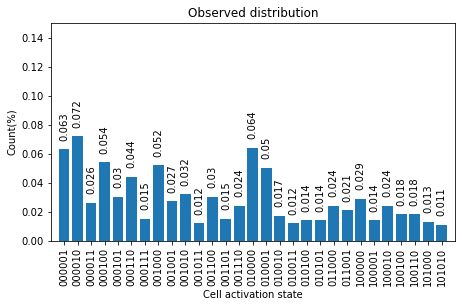

In [4]:
# mask = mini_hist(ngenes, p_obs, limit=0.01, ymax=0.15,
#                  title="Observed distribution",
#                  filename="01_p_obs.svg")

mask = mini_hist(ngenes, p_obs, limit=0.01, ymax=0.15,
                 title="Observed distribution",
                 filename="03_p_obs.svg")

In [5]:
theta = theta_init(genes, activation_ratios=activation)
edges = edges_init(genes)
qgrn = model(ncells, genes, theta, edges, p_obs, epochs=5000, learning_rate=0.05, save_theta=True)

2022-11-21 15:26:31 | I | Theta series is initialized using zeros as method with activation values
2022-11-21 15:26:31 | I | Edges for the QuantumGRN and quantum circuit are created for 6 genes
2022-11-21 15:26:31 | I | The QuantumGRN model is been initialized with 6 genes and 28208 cells


In [6]:
p_init = qgrn.output_probabilities(drop_zero=True).reshape(2**ngenes,)

2022-11-21 15:31:39 | I | Plotting the Comparison of distributions in a barplot and exporting to 03_comparison_obs_init.svg file.


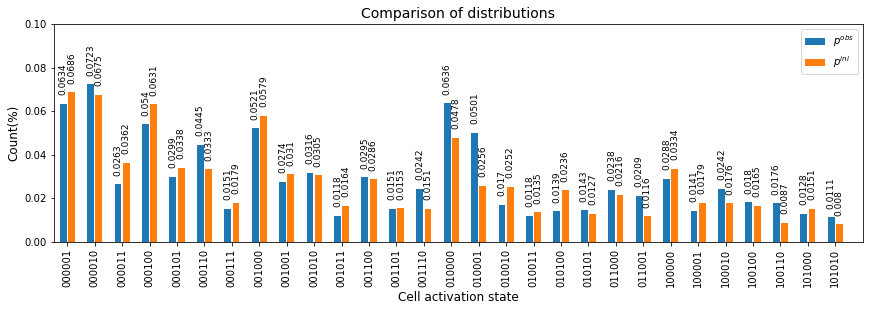

In [17]:
comparison_hist(ngenes, p_obs, p_init, limit=0.01, ymax=0.10, mask=mask,
                filename="03_comparison_obs_init.svg", tags=["p^{obs}", "p^{ini}"])

In [8]:
qgrn.train()

2022-11-21 15:26:33 | I | Starting the optimization for the QuantumGRN
 998/5000 [========>.........................................] - ETA: 5:552022-11-21 15:28:02 | I | Optimization completed!!.. Due to the number of epochs reached


In [16]:
p_out = qgrn.p_out.reshape(2**ngenes,)

2022-11-21 15:28:02 | I | Plotting the Comparison of distributions in a barplot and exporting to 03_comparison_obs_out.svg file.


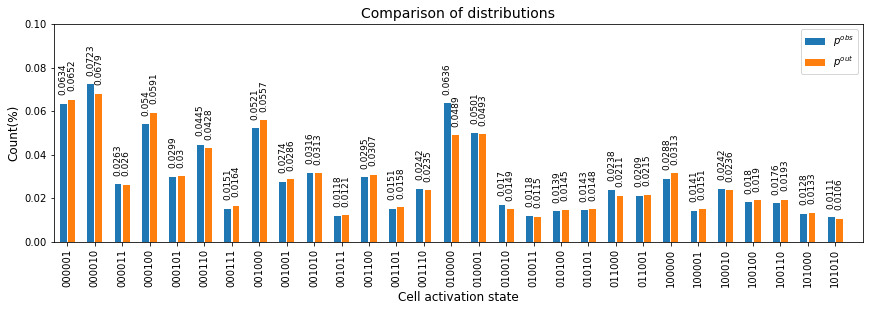

In [10]:
comparison_hist(ngenes, p_obs, p_out, limit=0.01, ymax=0.10, mask=mask,
                filename="03_comparison_obs_out.svg")

In [11]:
qgrn.theta

control  target
IRF4     IRF4      1.263814
         REL      -0.070257
         PAX5     -0.005516
         RELA      0.001224
         PRDM1     0.166084
         AICDA    -0.018163
REL      IRF4     -0.070257
         REL       1.256516
         PAX5      0.078104
         RELA      0.014694
         PRDM1    -0.129201
         AICDA     0.083658
PAX5     IRF4     -0.005516
         REL       0.078104
         PAX5      1.224887
         RELA      0.042895
         PRDM1    -0.101412
         AICDA     0.066647
RELA     IRF4      0.001224
         REL       0.014694
         PAX5      0.042895
         RELA      1.184027
         PRDM1    -0.004324
         AICDA    -0.003171
PRDM1    IRF4      0.166084
         REL      -0.129201
         PAX5     -0.101412
         RELA     -0.004324
         PRDM1     1.097574
         AICDA    -0.078224
AICDA    IRF4     -0.018163
         REL       0.083658
         PAX5      0.066647
         RELA     -0.003171
         PRDM1    -0.078224
    

In [12]:
from qscgrn import draw_network

draw_network(genes, edges, qgrn.theta, threshold=1, filename="03_qgrn_network.svg")

2022-11-21 15:28:03 | I | Drawing the network representation of the qscGRN model and exporting to 03_qgrn_network.svg file.


In [13]:
p_qiskit = qgrn.run_qiskit(threshold=1, filename="03_qscgrn.svg")

2022-11-21 15:28:05 | I | Drawing the quantum circuit of the qscGRN model and saving to 03_qscgrn.svg


2022-11-21 15:28:05 | I | Plotting the Comparison of distributions in a barplot and exporting to 03_comparison_obs_qiskit.svg file.


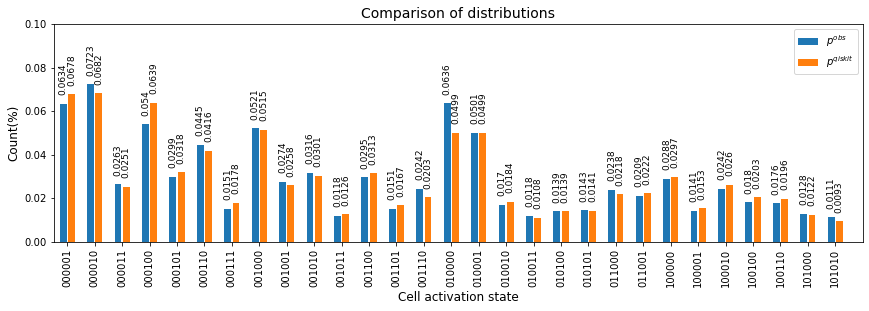

In [14]:
comparison_hist(ngenes, p_obs, p_qiskit, limit=0.01, ymax=0.1, mask=mask,
                filename="03_comparison_obs_qiskit.svg", tags=["p^{obs}", "p^{qiskit}"])

In [15]:
qgrn.export_training_theta("03_evo_theta.csv")

2022-11-21 15:28:07 | I | Theta values during optimization are exported to 03_evo_theta.csv


In [65]:
xx = np.load(r"C:\Users\Cristhian\Documents\quantum_ms\cai_computer\qscgrn\tutorial\loss_pearson.npy")

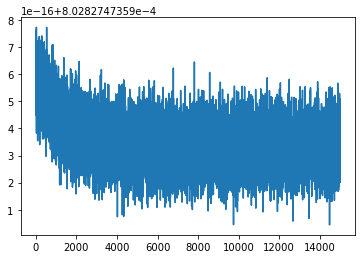

In [74]:
plt.plot(xx[35000:50000])